# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Cleaned Data

From the data cleaning notebook, there are two different files:
1. `annual_aqi_clean.csv` is annual summary data from the EPA's AirData system
2. `aqs_by_county_clean.csv` is sensor data that was collected via the EPA's AQS API

The annual summary data will contain more information on the number of days in various areas such as days with AQI measureed, good, moderate, unhealthy, very unhealthy, and hazardous air quality.  There are also columns concerning specific pollutant measurements like pm2.5, pm10, and ozone.

The AQS data is also annual summary data, but on a measured pollutant basis.  So it contains values for measurements of specific pollutants in counties for the year.

In [2]:
# Annual AQI summary data
aqi = pd.read_csv('data/annual_aqi_clean.csv')

# AQS sensor data collected via API
aqs = pd.read_csv('data/aqs_by_county_clean.csv')

## AQI Annual Summary EDA

In this section, we'll be looking at the AQI data, which is summary day count information on a year and county basis.

Some sources to help understand the following pollutants and data:
* Particulate Matter (PM10, PM2.5): https://www.epa.gov/pm-pollution
* Ground Level Ozone (Ozone): https://www.epa.gov/ground-level-ozone-pollution
* Carbon Monoxide (CO): https://www.epa.gov/co-pollution
* Nitrogen Dioxide (NO2): https://www.epa.gov/no2-pollution

In [3]:
aqi.head()

,state,county,year,days_with_aqi,good_days,mod_days,uh_sens_days,uh_days,v_uh_days,haz_days,...,days_pm2.5,days_pm10,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
0,california,alameda,2009,365,190,162,12,1,0,0,...,234,0,1136.0,1980.992,34.260,17700.0,3314.900,38.817,0.064,0
1,california,butte,2009,365,185,148,31,1,0,0,...,101,0,90.0,1963.467,33.809,1907.0,3390.433,38.850,0.047,0
2,california,contra costa,2009,365,274,84,6,1,0,0,...,78,0,669.0,2002.323,34.283,10976.0,3330.618,38.823,0.061,0
3,california,el dorado,2009,362,240,82,33,7,0,0,...,2,1,88.0,1981.477,34.511,1410.0,3330.952,38.821,0.062,0
4,california,fresno,2009,365,109,140,80,36,0,0,...,129,0,1068.0,1959.166,33.788,14117.0,3271.289,38.489,0.076,0


In [4]:
aqi.shape

(4635, 26)

In [5]:
aqi.columns

Index(['state', 'county', 'year', 'days_with_aqi', 'good_days', 'mod_days',
       'uh_sens_days', 'uh_days', 'v_uh_days', 'haz_days', 'max_aqi',
       '90_per_aqi', 'median_aqi', 'days_co', 'days_no2', 'days_ozone',
       'days_pm2.5', 'days_pm10', 'births_low', 'avg_weight_low',
       'avg_ges_age_low', 'births_all', 'avg_weight_all', 'avg_ges_age_all',
       'pct_low', 'high_rate'],
      dtype='object')

In [6]:
aqi.dtypes

state               object
county              object
year                 int64
days_with_aqi        int64
good_days            int64
mod_days             int64
uh_sens_days         int64
uh_days              int64
v_uh_days            int64
haz_days             int64
max_aqi              int64
90_per_aqi           int64
median_aqi           int64
days_co              int64
days_no2             int64
days_ozone           int64
days_pm2.5           int64
days_pm10            int64
births_low         float64
avg_weight_low     float64
avg_ges_age_low    float64
births_all         float64
avg_weight_all     float64
avg_ges_age_all    float64
pct_low            float64
high_rate            int64
dtype: object

In [7]:
aqi['year'].sort_values().unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

### Filter Data

The EPA generally uses 75% as a number of observations to ensure relevancy.  So we'll filter the aqi data to only look at records where `days_with_aqi` is greater than 75% of the days in a year.

In [8]:
aqi = aqi[aqi['days_with_aqi'] > (365 * .75)]

### Air Quality Index (AQI) Day Count

From the EPA:

Each category corresponds to a different level of health concern. The six levels of health concern and what they mean are:
* **"Good"** AQI is 0 - 50. Air quality is considered satisfactory, and air pollution poses little or no risk.
* **"Moderate"** AQI is 51 - 100. Air quality is acceptable; however, for some pollutants there may be a moderate health concern for a very small number of people. For example, people who are unusually sensitive to ozone may experience respiratory symptoms.
* **"Unhealthy for Sensitive Groups"** AQI is 101 - 150. Although general public is not likely to be affected at this AQI range, people with lung disease, older adults and children are at a greater risk from exposure to ozone, whereas persons with heart and lung disease, older adults and children are at greater risk from the presence of particles in the air.
* **"Unhealthy"** AQI is 151 - 200. Everyone may begin to experience some adverse health effects, and members of the sensitive groups may experience more serious effects.
* **"Very Unhealthy"** AQI is 201 - 300. This would trigger a health alert signifying that everyone may experience more serious health effects.
* **"Hazardous"** AQI greater than 300. This would trigger health warnings of emergency conditions. The entire population is more likely to be affected.

[source](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information#other)

In [9]:
aqi[[col for col in aqi.columns if col.find('_days') != -1]].describe()

,good_days,mod_days,uh_sens_days,uh_days,v_uh_days,haz_days
count,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000
mean,258.318776,91.740933,8.193190,1.767580,0.182087,0.052800
std,65.911144,54.021439,16.113551,6.721601,1.625441,0.597523
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.000000,50.000000,0.000000,0.000000,0.000000,0.000000
50%,272.000000,82.000000,2.000000,0.000000,0.000000,0.000000
75%,307.000000,125.000000,8.000000,1.000000,0.000000,0.000000
max,365.000000,339.000000,122.000000,74.000000,74.000000,18.000000


When looking through these descriptive statistics for all of the day counts for the general air quality, most of the days are concentrated in good and moderate.  Unhealthy, very unhealthy, and hazardous are largely absent--even the 75th percentile values for all of those categories is 0, so very few locations had many days with that type of air quality.

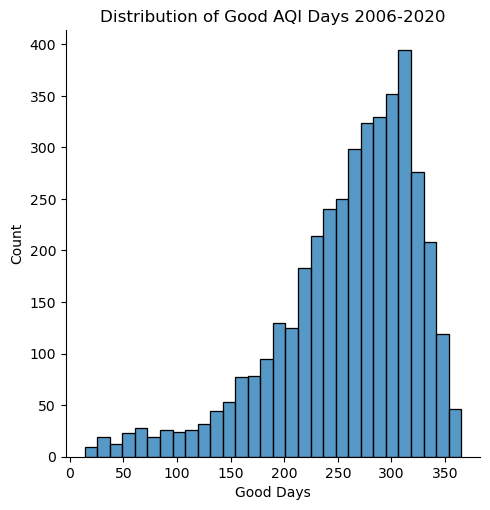

In [10]:
sns.displot(data=aqi,
            x='good_days',
            kind='hist',
            bins=30).set(xlabel='Good Days',
                         title='Distribution of Good AQI Days 2006-2020');

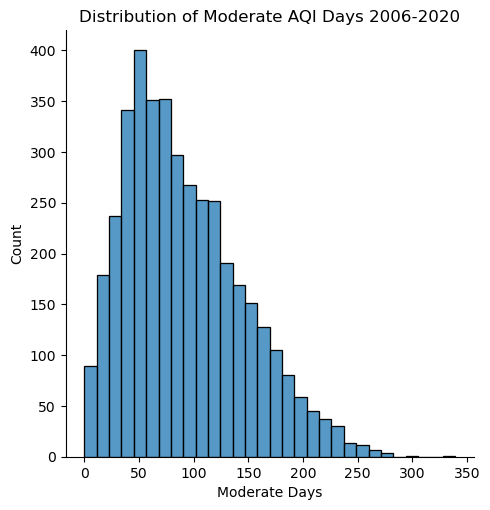

In [11]:
sns.displot(data=aqi,
            x='mod_days',
            kind='hist',
            bins=30).set(xlabel='Moderate Days',
                         title='Distribution of Moderate AQI Days 2006-2020');

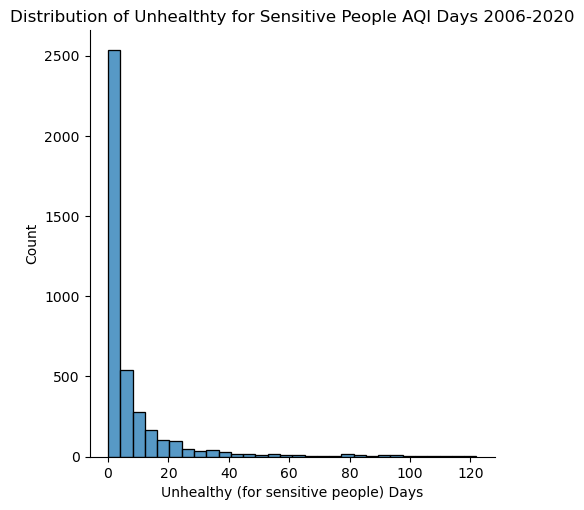

In [12]:
sns.displot(data=aqi,
            x='uh_sens_days',
            kind='hist',
            bins=30).set(xlabel='Unhealthy (for sensitive people) Days',
                         title='Distribution of Unhealthty for Sensitive People AQI Days 2006-2020');

Overall, looking at these distributions gives an idea that the data is has mostly good and moderate day counts, and most categories beyond that have very few records.

### Pollutant Specific Day Count

When looking at the `days_[pollutant]` columns, those represent which pollutant was the most prevalent for each `days_with_aqi` meaning that the counts of the 4 pollutant days equals the `days_with_aqi`

In [13]:
aqi[[col for col in aqi.columns if col.find('days_') != -1]].describe()

,days_with_aqi,days_co,days_no2,days_ozone,days_pm2.5,days_pm10
count,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000
mean,360.255366,0.899087,9.765606,195.551443,146.970392,7.068838
std,13.702277,7.450258,25.284352,97.780622,97.245154,26.588710
min,275.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,362.000000,0.000000,0.000000,140.000000,71.000000,0.000000
50%,365.000000,0.000000,0.000000,199.000000,146.000000,0.000000
75%,365.000000,0.000000,6.000000,254.000000,207.000000,1.000000
max,366.000000,131.000000,300.000000,366.000000,366.000000,346.000000


The values all look reasonable, since these columns all represent the count of days in a year. 

Check to see top 10 observations for each pollutant (count of days where pollutant was the main pollutant)

#### Days PM10

PM10: Particulate Matter; inhalable particles, with diameters that are generally 10 micrometers and smaller;

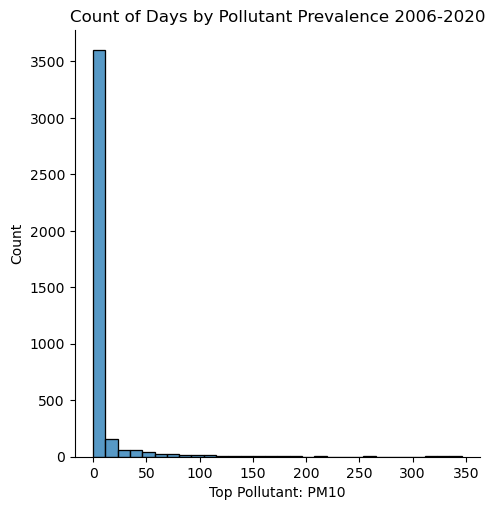

In [124]:
sns.displot(aqi,
            x='days_pm10',
            kind='hist',
            bins=30).set(xlabel='Top Pollutant: PM10',
                         title='Count of Days by Pollutant Prevalence 2006-2020');

In [120]:
aqi[
    ['state', 'county', 'year', 'pct_low', 'high_rate', 'days_pm10']
].sort_values(by='days_pm10', ascending=False).head(10)

,state,county,year,pct_low,high_rate,days_pm10
1562,arizona,mohave,2014,0.060,0,346
1150,arizona,mohave,2019,0.066,0,337
189,arizona,mohave,2020,0.052,0,333
738,arizona,mohave,2018,0.051,0,330
2346,arizona,mohave,2017,0.045,0,323
2757,arizona,mohave,2016,0.056,0,323
1942,arizona,mohave,2015,0.054,0,323
1660,idaho,canyon,2014,0.047,0,319
3605,arizona,mohave,2013,0.057,0,316
3198,colorado,mesa,2006,0.060,0,274


#### Days PM2.5

PM2.5: Particulate Matter; fine inhalable particles, with diameters that are generally 2.5 micrometers and smaller.

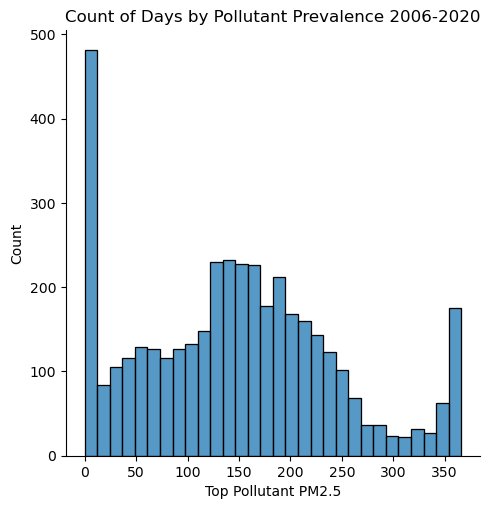

In [122]:
sns.displot(aqi,
            x='days_pm2.5',
            kind='hist',
            bins=30).set(xlabel='Top Pollutant: PM2.5',
                         title='Count of Days by Pollutant Prevalence 2006-2020');

In [125]:
aqi[
    ['state', 'county', 'year', 'pct_low', 'high_rate', 'days_pm2.5']
].sort_values(by='days_pm2.5', ascending=False).head(10)

,state,county,year,pct_low,high_rate,days_pm2.5
320,iowa,black hawk,2020,0.078,0,366
508,oregon,linn,2020,0.047,0,366
2855,hawaii,hawaii,2016,0.081,0,366
3535,oregon,linn,2012,0.048,0,366
3395,iowa,johnson,2012,0.057,0,366
3545,texas,ector,2012,0.076,0,366
288,hawaii,hawaii,2020,0.077,0,366
3076,oregon,linn,2016,0.032,0,366
3136,washington,snohomish,2016,0.047,0,366
711,texas,ector,2008,0.092,1,366


#### Days Ozone
Ground-level Ozone: Ozone at ground level is a harmful air pollutant, because of its effects on people and the environment, and it is the main ingredient in “smog."
[source](https://www.epa.gov/ground-level-ozone-pollution/ground-level-ozone-basics#effects)

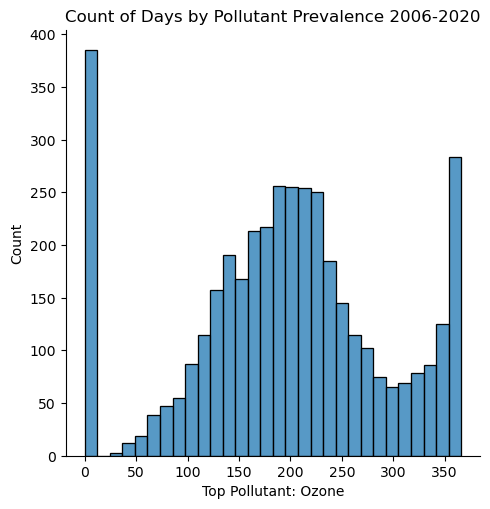

In [128]:
sns.displot(aqi,
            x='days_ozone',
            kind='hist',
            bins=30).set(xlabel='Top Pollutant: Ozone',
                         title='Count of Days by Pollutant Prevalence 2006-2020');

In [126]:
aqi[
    ['state', 'county', 'year', 'pct_low', 'high_rate', 'days_ozone']
].sort_values(by='days_ozone', ascending=False).head(10)

,state,county,year,pct_low,high_rate,days_ozone
256,florida,manatee,2020,0.067,0,366
3325,colorado,jefferson,2012,0.076,0,366
237,colorado,jefferson,2020,0.076,0,366
3348,florida,pasco,2012,0.062,0,366
3344,florida,okaloosa,2012,0.057,0,366
3340,florida,manatee,2012,0.058,0,366
2805,colorado,jefferson,2016,0.068,0,366
2821,florida,manatee,2016,0.064,0,366
2827,florida,osceola,2016,0.072,0,366
2829,florida,pasco,2016,0.065,0,366


#### Days CO
Carbon monoxide: CO is a colorless, odorless gas that can be harmful when inhaled in large amounts. CO is released when something is burned. The greatest sources of CO to outdoor air are cars, trucks and other vehicles or machinery that burn fossil fuels.
[source](https://www.epa.gov/co-pollution/basic-information-about-carbon-monoxide-co-outdoor-air-pollution#What%20is%20CO)

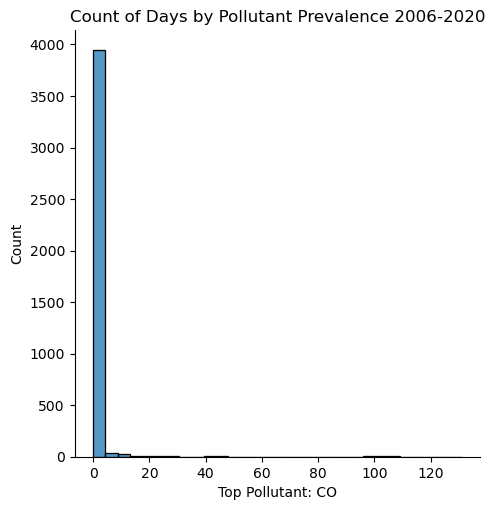

In [129]:
sns.displot(aqi,
            x='days_co',
            kind='hist',
            bins=30).set(xlabel='Top Pollutant: CO',
                         title='Count of Days by Pollutant Prevalence 2006-2020');

In [127]:
aqi[
    ['state', 'county', 'year', 'pct_low', 'high_rate', 'days_co']
].sort_values(by='days_co', ascending=False).head(10)

,state,county,year,pct_low,high_rate,days_co
654,montana,yellowstone,2008,0.057,0,131
699,ohio,stark,2008,0.063,0,108
3234,new york,niagara,2006,0.052,0,107
4082,ohio,stark,2007,0.068,0,106
1905,virginia,richmond city,2014,0.096,1,103
3262,ohio,montgomery,2006,0.067,0,102
689,ohio,franklin,2008,0.069,0,102
4080,ohio,montgomery,2007,0.067,0,102
3889,ohio,summit,2013,0.069,0,101
4083,ohio,summit,2007,0.060,0,101


#### Days NO2
Nitrogen Dioxide: Nitrogen Dioxide (NO2) is one of a group of highly reactive gases known as oxides of nitrogen or nitrogen oxides (NOx). Other nitrogen oxides include nitrous acid and nitric acid. NO2 is used as the indicator for the larger group of nitrogen oxides. [source](https://www.epa.gov/no2-pollution/basic-information-about-no2#What%20is%20NO2)

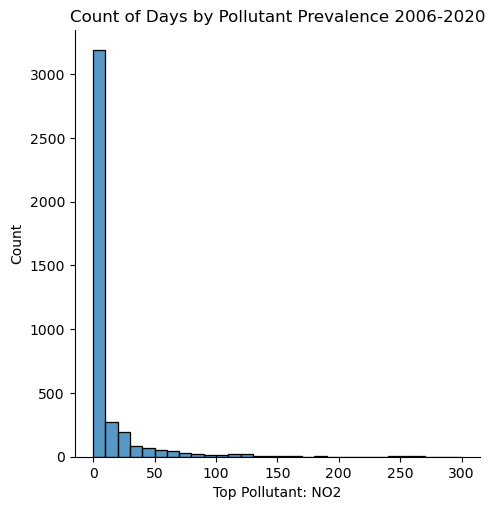

In [131]:
sns.displot(aqi,
            x='days_no2',
            kind='hist',
            bins=30).set(xlabel='Top Pollutant: NO2',
                         title='Count of Days by Pollutant Prevalence 2006-2020');

In [130]:
aqi[
    ['state', 'county', 'year', 'pct_low', 'high_rate', 'days_no2']
].sort_values(by='days_no2', ascending=False).head(10)

,state,county,year,pct_low,high_rate,days_no2
2299,virginia,alexandria city,2015,0.053,0,300
565,virginia,norfolk city,2020,0.089,1,266
1905,virginia,richmond city,2014,0.096,1,262
3233,new york,nassau,2006,0.070,0,262
3128,virginia,norfolk city,2016,0.094,1,255
1109,virginia,norfolk city,2018,0.103,1,254
1903,virginia,norfolk city,2014,0.087,1,249
3941,virginia,norfolk city,2013,0.087,1,247
2715,virginia,norfolk city,2017,0.089,1,244
3563,virginia,alexandria city,2012,0.062,0,182


In each of the sections it was interesting that there were often repeat locations, which may indicate there is some specific cause in that area for particular pollutants to be more elevated than the others.  For example in the Nitrogen Dioxide days count, all but one of the observations are from Virginia, and most are in Norfolk City.  This was also the only pollutant-specific day count area, where when looking at the top 10 observations, there were multiple indicators of high rates of low birthweight.

According to the [EPA](https://www.epa.gov/no2-pollution/basic-information-about-no2), "Nitrogen Dioxide (NO2) is one of a group of highly reactive gases known as oxides of nitrogen or nitrogen oxides (NOx). Other nitrogen oxides include nitrous acid and nitric acid. NO2 is used as the indicator for the larger group of nitrogen oxides.

NO2 primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment."

So even though there are many days in this area, there is no specific mention about a connection between this pollutant and birthweight.  As far as what contributes to these levels in the Virginia area may be a good topic for future research.

### AQI Median and 90 Percentile Days

These values represent the median AQI and the 90 percentile AQI score for the county for the year reported.

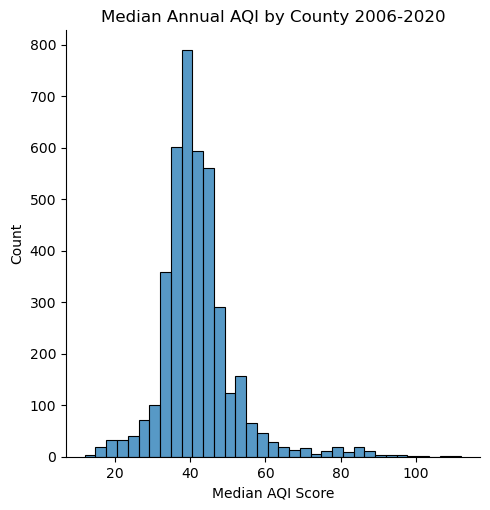

In [133]:
sns.displot(aqi,
            x='median_aqi',
            kind='hist',
            bins=35).set(xlabel='Median AQI Score',
                         title='Median Annual AQI by County 2006-2020');

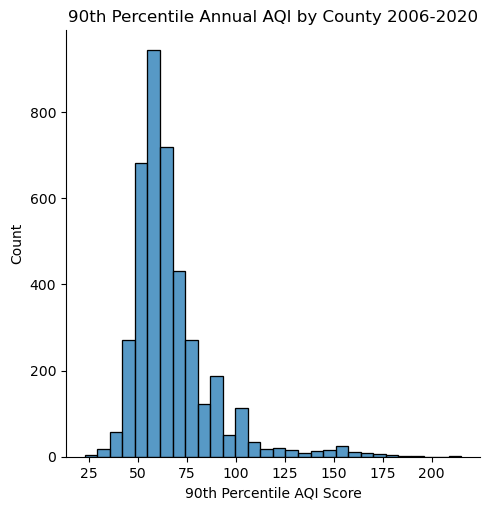

In [134]:
sns.displot(aqi,
            x='90_per_aqi',
            kind='hist',
            bins=30).set(xlabel='90th Percentile AQI Score',
                         title='90th Percentile Annual AQI by County 2006-2020');

### Birth Weight Rate Observations

Let's look a bit at the target data

Observations by low birth weight percentage (highest 10)

In [26]:
aqi.sort_values(by='pct_low', ascending=False).head(10)

,state,county,year,days_with_aqi,good_days,mod_days,uh_sens_days,uh_days,v_uh_days,haz_days,...,days_pm2.5,days_pm10,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
4496,louisiana,caddo,2010,363,261,91,11,0,0,0,...,60,0,402.0,1977.264,33.945,2986.0,3088.602,37.874,0.135,1
1768,mississippi,hinds,2014,365,180,184,0,1,0,0,...,274,0,363.0,1931.003,33.959,2779.0,3065.051,37.917,0.131,1
4233,louisiana,caddo,2011,365,240,107,18,0,0,0,...,68,0,372.0,1939.624,33.747,2871.0,3099.827,37.870,0.130,1
401,mississippi,hinds,2020,366,249,116,1,0,0,0,...,265,0,290.0,2035.279,34.610,2226.0,3081.211,37.933,0.130,1
287,georgia,richmond,2020,366,268,97,1,0,0,0,...,267,15,262.0,1965.233,34.351,2099.0,3124.365,38.307,0.125,1
2559,mississippi,hinds,2017,365,256,109,0,0,0,0,...,243,0,322.0,1909.012,33.643,2572.0,3069.387,37.916,0.125,1
3445,mississippi,hinds,2012,366,241,122,2,1,0,0,...,249,0,327.0,1986.190,34.217,2668.0,3082.299,37.973,0.123,1
1360,mississippi,hinds,2019,365,256,109,0,0,0,0,...,222,0,290.0,2038.310,34.379,2351.0,3094.378,37.923,0.123,1
2153,mississippi,hinds,2015,365,217,148,0,0,0,0,...,253,0,307.0,1967.857,34.094,2566.0,3085.500,37.993,0.120,1
3938,virginia,hampton city,2013,359,313,44,2,0,0,0,...,181,0,48.0,1738.479,32.729,399.0,3205.329,38.266,0.120,1


Like some of the pollutant day count data, we see that some of the highest low birth weight rates occur in the same county in multiple years.  Most of these counties have a good day count below the mean for the data set and a moderate day count above the mean for the data set.  It will be interesting to see if these day counts can be used for an effective model.

Observations by low birth weight percentage (lowest 10)

In [27]:
aqi.sort_values(by='pct_low', ascending=True).head(10)

,state,county,year,days_with_aqi,good_days,mod_days,uh_sens_days,uh_days,v_uh_days,haz_days,...,days_pm2.5,days_pm10,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
460,new york,tompkins,2020,364,359,5,0,0,0,0,...,0,0,13.0,2204.077,35.077,530.0,3403.653,39.079,0.025,0
1419,new york,tompkins,2019,356,349,7,0,0,0,0,...,0,0,14.0,2174.000,35.571,510.0,3414.189,39.043,0.027,0
1907,washington,cowlitz,2014,323,309,14,0,0,0,0,...,323,0,24.0,1982.417,34.125,804.0,3443.707,39.232,0.030,0
1467,oregon,linn,2019,365,280,83,2,0,0,0,...,365,0,33.0,2000.636,33.939,1048.0,3498.659,39.032,0.031,0
593,california,humboldt,2008,364,349,15,0,0,0,0,...,50,4,37.0,1884.730,33.556,1168.0,3430.532,38.935,0.032,0
3076,oregon,linn,2016,366,333,33,0,0,0,0,...,366,0,33.0,2068.242,34.424,1027.0,3460.391,39.009,0.032,0
3084,pennsylvania,blair,2016,366,285,79,2,0,0,0,...,166,4,28.0,1989.750,34.143,846.0,3410.701,38.995,0.033,0
2735,wisconsin,la crosse,2017,360,311,49,0,0,0,0,...,166,0,27.0,2059.185,33.889,819.0,3462.660,39.269,0.033,0
2649,ohio,medina,2017,364,292,72,0,0,0,0,...,157,0,41.0,2051.732,34.878,1231.0,3438.399,38.957,0.033,0
1478,pennsylvania,centre,2019,365,267,98,0,0,0,0,...,162,0,27.0,2042.370,34.296,819.0,3428.707,39.076,0.033,0


Although there are some repeat locations on this list, it is more diverse than the locations for the highest rates.  It can be seen here that the good days count far exceed the moderate day count.

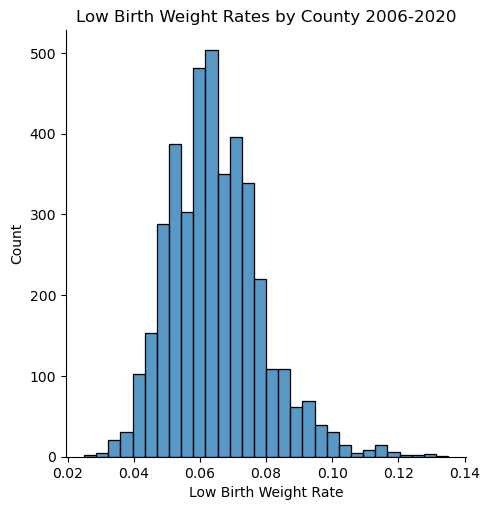

In [135]:
sns.displot(aqi,
            x='pct_low',
            kind='hist',
            bins=30).set(xlabel='Low Birth Weight Rate',
                         title='Low Birth Weight Rates by County 2006-2020');

During data collection and cleaning, a high rate feature was created that classifies the rate for the county as "high" if the rate for the year exceeds the current national mean rate of 8.24%.  In the cleaned and now filtered data, let us look at the balance between the classes.

In [136]:
aqi['high_rate'].value_counts(normalize=True)

0    0.902048
1    0.097952
Name: high_rate, dtype: float64

This is a very unbalanced class and will be a challenge to model.  Let's take a look at a correlation heatmap to see if any particular features appear correlated with the low birth weight rate or classification:

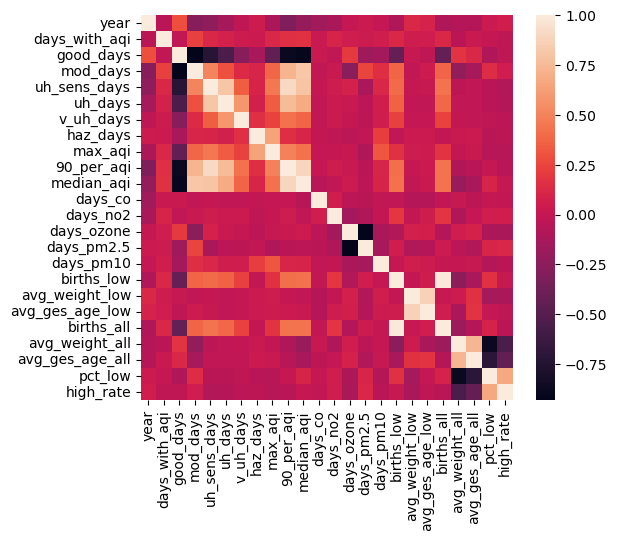

In [147]:
plt.figure(figsize=(6, 5))
sns.heatmap(aqi.corr(numeric_only=True));

Here we don't see any particularly strong positive correlations between `pct_low` or `high_rate` and many other features.  It does appear there is slightly positive correlation with the features `mod_days`, `median_aqi`, `days_no2`, and `days_pm2.5`.  And a slightly negative correlation with `good_days`, `days_ozone`, and `days_pm10`

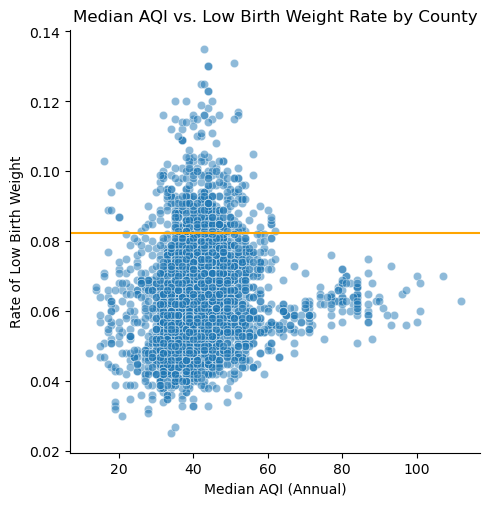

In [153]:
sns.relplot(aqi, 
            x='median_aqi', 
            y='pct_low',
            alpha=0.5).set(title='Median AQI vs. Low Birth Weight Rate by County',
                             xlabel='Median AQI (Annual)',
                             ylabel='Rate of Low Birth Weight')

# add line for national mean and divider for 'high rate'
plt.axhline(.0824, color='orange');

There doesn't appear to be any obvious correlation here.  You can also see some of the imbalance of the class when you see how many data points are below the national average.

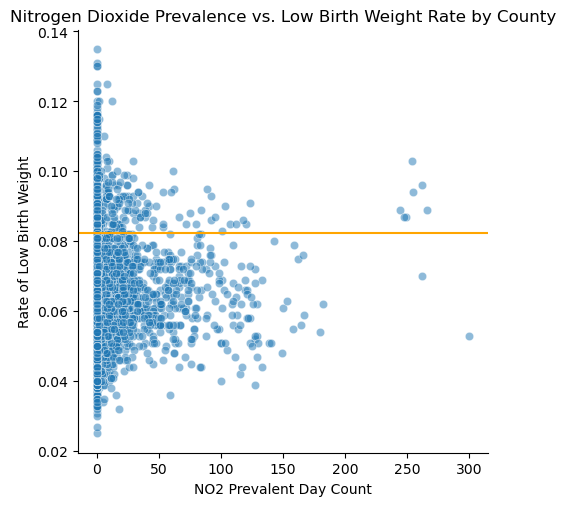

In [155]:
sns.relplot(aqi, 
            x='days_no2', 
            y='pct_low',
            alpha=0.5).set(title='Nitrogen Dioxide Prevalence vs. Low Birth Weight Rate by County',
                             xlabel='NO2 Prevalent Day Count',
                             ylabel='Rate of Low Birth Weight')

# add line for national mean and divider for 'high rate'
plt.axhline(.0824, color='orange');

There also doesn't seem to be any strong correlation that appears when plotting this data.  As we saw in the earlier distributions, we see a high concentration 0 day counts, but there are still many high rate observations.  At the same time, there are many 0 day counts with below average rate observations.

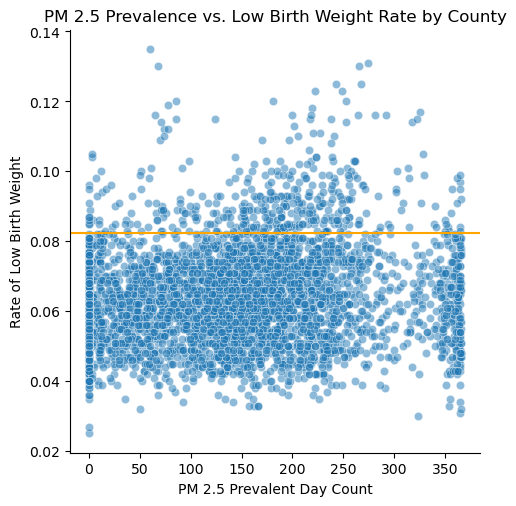

In [159]:
sns.relplot(aqi, 
            x='days_pm2.5', 
            y='pct_low',
            alpha=0.5).set(title='PM 2.5 Prevalence vs. Low Birth Weight Rate by County',
                             xlabel='PM 2.5 Prevalent Day Count',
                             ylabel='Rate of Low Birth Weight')

# add line for national mean and divider for 'high rate'
plt.axhline(.0824, color='orange');

There doesn't appear to be any obvious correlation here.  This is another instance where some of the imbalance of the class becomes more clear.

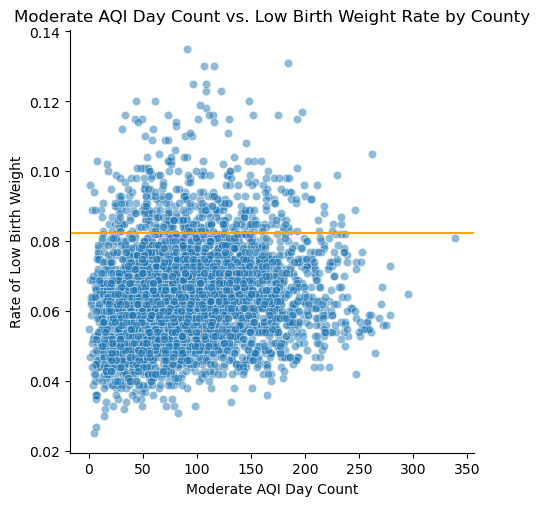

In [158]:
sns.relplot(aqi, 
            x='mod_days', 
            y='pct_low',
            alpha=0.5).set(title='Moderate AQI Day Count vs. Low Birth Weight Rate by County',
                             xlabel='Moderate AQI Day Count',
                             ylabel='Rate of Low Birth Weight')

# add line for national mean and divider for 'high rate'
plt.axhline(.0824, color='orange');

The shape of this plot almost looks conic, which is interesting.  It does have a very slight positive shape, but it is not obvious.